# Linear Regression Assignment
___

## Table Of Contents
- [Problem Statement](#problem-statement)
- [Business Goal](#business-goal)
- [Reading And Understanding Data](#reading-and-understanding-data)
  - [Import Libraries](#import-all-the-required-librarires-classes-and-methods)
  - [Supress Warnings](#supressing-library-warnings)
  - [Analyse Data](#read-dataset-and-check-the-kind-of-data-its-storing)
- [Data Dictionary](#data-dictionary)

___

## Problem Statement
>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


>They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

>Which variables are significant in predicting the demand for shared bikes.
>How well those variables describe the bike demands
>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
___

## Business Goal:
>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

>For the given problem our target variable is 'cnt'. You have to find the factors affecting the count of total rental bikes including both casual and registered. 
> - create linear model that quantitatively relates rental bikes count with the other variables.
> - know the accuracy of the model.
___

### Steps Involved
- Reading, Understanding and visualizing the data.
- Preparing the data for modelling(train-test split, rescaling etc.)
- Training the model.
- Verifying the model on the train set.
- Predictions and analysis on the test set. 
___

## Reading And Understanding Data

### Import all the required librarires, classes and methods.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler

### Supressing library warnings.

In [41]:
warnings.filterwarnings('ignore')

### Read Dataset and Check the kind of data it's storing.

In [42]:
boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Dictionary
| Variable | Meaning |
| --- | ----------- |
|instant | Record Index| 
|dteday | Date|
|season | Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)|
|yr | Year (0: 2018, 1:2019)|
| mnth | month ( 1 to 12)|
| holiday | weather day is a holiday or not|
| weekday | day of the week|
|workingday | if day is neither weekend nor holiday is 1, otherwise is 0.|
|temp | temperature in Celsius|	
|atemp| feeling temperature in Celsius|
|hum| humidity|
|windspeed| wind speed|
|casual| count of casual users|
|registered| count of registered users|
|cnt| count of total rental bikes including both casual and registered|
|weathersit | 1 - Clear, Few clouds, Partly cloudy, Partly cloudy.</br> 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.</br>3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.</br>4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
___

In [43]:
boom_bikes.shape

(730, 16)

**Total Records - 730**</br>
**cells per record - 16**

In [44]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Mean, Median, Min, Max, 25 and 75 percntile description of the dataset(Column Wise)**

In [45]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**There are no empty columns and rows in the dataset**
___

### Visualizing the numerical variables

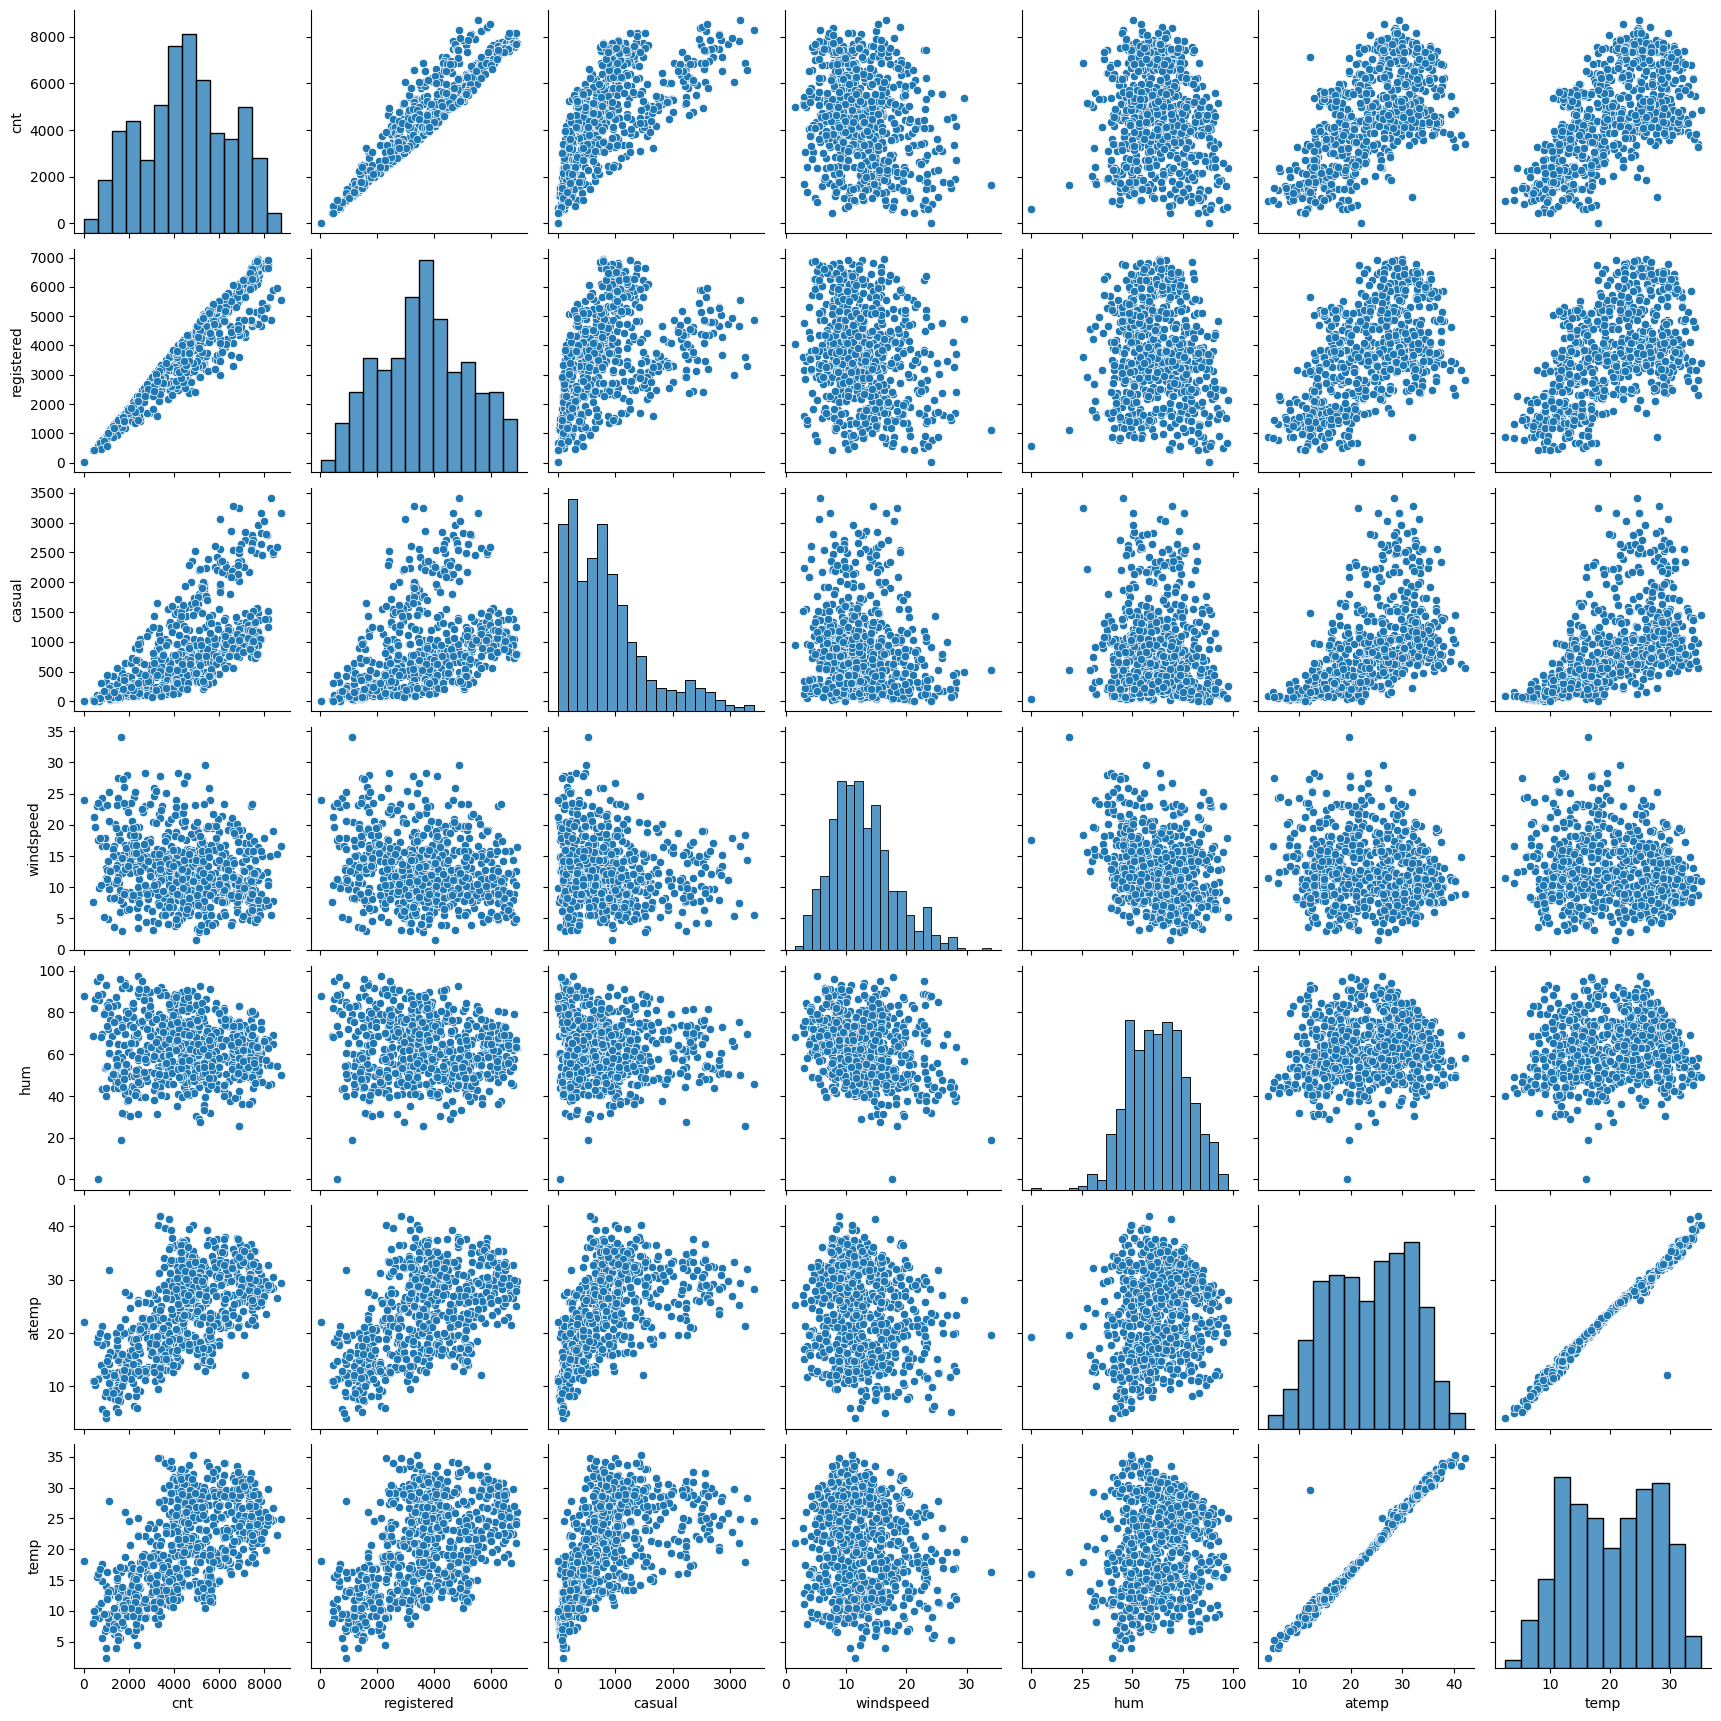

In [46]:
numerical_vars = ['cnt', 'registered', 'casual', 'windspeed', 'hum', 'atemp', 'temp']
sns.pairplot(boom_bikes[numerical_vars])

*as we can see in the pairplot, A few of the numerical variables like temp, atemp and registered has positive relationship and kind of linear relationship with the 'cnt' we can proceed with the linear regression model for the provided data.*

### Visualizing the categorical variables

In [47]:
boom_bikes['season'] = boom_bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bikes['mnth'] = boom_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bikes['weathersit'] = boom_bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boom_bikes['weekday'] = boom_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

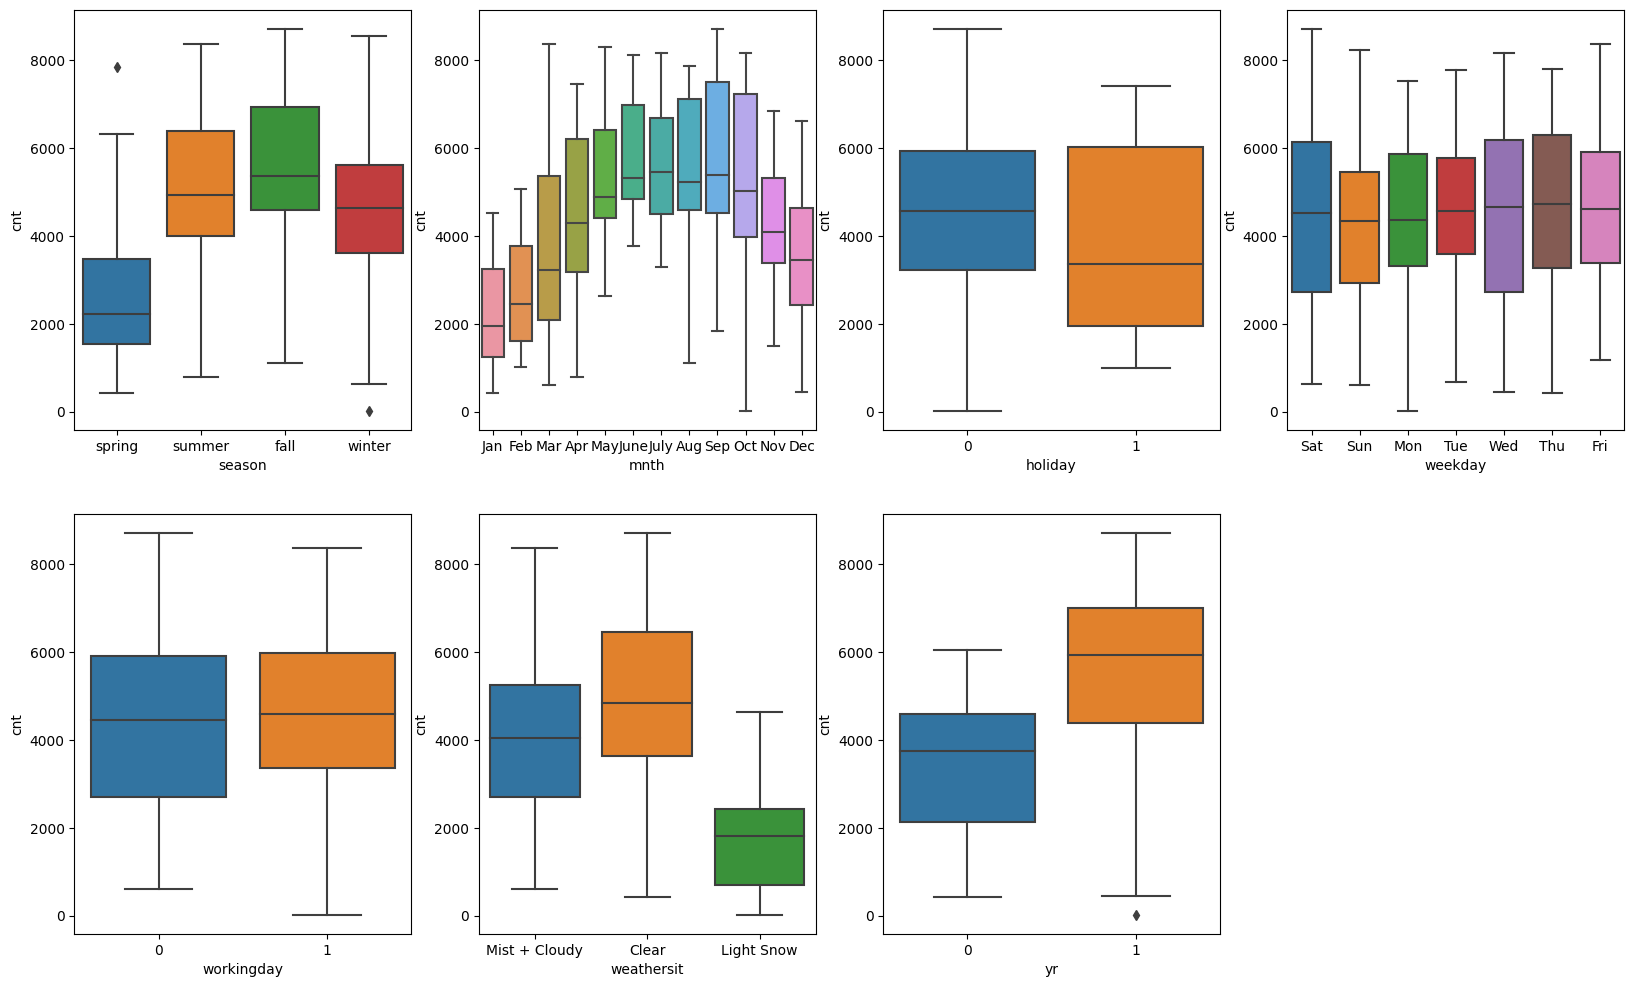

In [48]:
plt.figure(figsize= (20, 12))
plt.subplot(2, 4, 1)
box_plot = sns.boxplot(data = boom_bikes, x = 'season', y = 'cnt')
plt.subplot(2, 4, 2)
box_plot = sns.boxplot(data = boom_bikes, x = 'mnth', y = 'cnt')
plt.subplot(2, 4, 3)
box_plot = sns.boxplot(data = boom_bikes, x = 'holiday', y = 'cnt')
plt.subplot(2, 4, 4)
box_plot = sns.boxplot(data = boom_bikes, x = 'weekday', y = 'cnt')
plt.subplot(2, 4, 5)
box_plot = sns.boxplot(data = boom_bikes, x = 'workingday', y = 'cnt')
plt.subplot(2, 4, 6)
box_plot = sns.boxplot(data = boom_bikes, x = 'weathersit', y = 'cnt')
plt.subplot(2, 4, 7)
box_plot = sns.boxplot(data = boom_bikes, x = 'yr', y = 'cnt')

### Insights shows the relationship between categorical variables and a Target variable.

Bike Rentals are more :
- during the Fall season and then in summer
- in the year 2019 compared to 2018
- in partly cloudy weather
- on Saturday,wednesday and thursday

___

## Data Preparation
- Encoding
    - Convert all the binary data to 1 and 0 rather than 'yes' and 'no'.
    - Create dummy variables for categorical variables.
- split into train-test set.